In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

## Question 1.a)

In [2]:
# set parameters
L = 1.0
pi = numpy.pi
dx = 0.01 # x resolution
N_x = int(L/dx) + 1 # number of time steps
x = numpy.linspace(0.0, L, num=N_x)
T_compute = numpy.zeros((5, N_x)) # store 5 different resolutions results
terms_grid = numpy.array([1, 2, 5, 100, 1000])

In [3]:
i = 0 # index for (i+1)-th grid resolution
T_compute = numpy.zeros((5, N_x)) # clear
for j in terms_grid:
    for n in range(1,j+1): # calculate summation
        T_compute[i] = T_compute[i] + (-1) ** (n + 1) / (2 * n - 1) * \
                        numpy.cos((2 * n - 1) * pi * x / (2 * L))
    T_compute[i] = T_compute[i] * 4 / pi
    i = i + 1

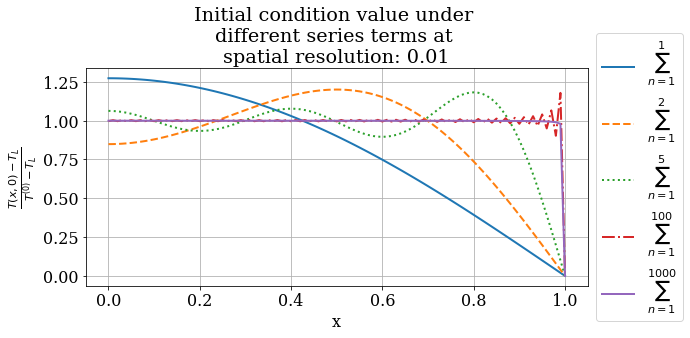

In [5]:
# plot
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Initial condition value under \ndifferent series terms at \nspatial resolution: {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$ \sum_{n=1}^{1}$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$ \sum_{n=1}^{2}$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$ \sum_{n=1}^{5}$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$ \sum_{n=1}^{100}$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.plot(x, T_compute[4], label=r'$ \sum_{n=1}^{1000}$',
            color='C4', linestyle='-', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));